In [5]:
from random import random
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.tsa as tsa
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel(f'exercise01.xlsx', index_col=0, header=0, engine='openpyxl')
#train_df, test_df = df.iloc[:120, :], df.iloc[120:, :]

In [6]:
#tsa.holtwinters.Holt(df.Deviation)

In [7]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    series = pd.Series(result[0:3], index=['Test statistic','p-value','Lags used'])
    for key,value in result[4].items():
       series[f'   Critical Value ({key})'] = value
    return series
    
def kpss_test(timeseries):
    result = kpss(timeseries, regression='c', nlags="auto")
    series = pd.Series(result[0:3], index=['Test statistic','p-value','Lags used'])
    for key,value in result[3].items():
        if key == "2.5%":
            continue
        series[f'   Critical Value ({key})'] = value
    return series

series = df.Deviation

print ('\nResults of Dickey-Fuller Test:')
print(adf_test(series))

print ('\nResults of KPSS Test:')
print(kpss_test(series))


Results of Dickey-Fuller Test:
Test statistic            -4.185143
p-value                    0.000698
Lags used                  3.000000
   Critical Value (1%)    -3.475953
   Critical Value (5%)    -2.881548
   Critical Value (10%)   -2.577439
dtype: float64

Results of KPSS Test:
Test statistic             1.526122
p-value                    0.010000
Lags used                  2.000000
   Critical Value (10%)    0.347000
   Critical Value (5%)     0.463000
   Critical Value (1%)     0.739000
dtype: float64


In [8]:
# Perform differencing
series_diff = (df.Deviation - df.Deviation.shift(1))
series_init = df.Deviation.iloc[0]

print ('\nResults of Dickey-Fuller Test (differenced):')
print(adf_test(series_diff.dropna()))

print ('\nResults of KPSS Test (differenced):')
print(kpss_test(series_diff.dropna()))

# Un-difference series
series_undiff = pd.concat([pd.Series(series_init), series_diff.iloc[1:]], axis=0).cumsum()


Results of Dickey-Fuller Test (differenced):
Test statistic            -6.917432e+00
p-value                    1.169674e-09
Lags used                  1.100000e+01
   Critical Value (1%)    -3.479007e+00
   Critical Value (5%)    -2.882878e+00
   Critical Value (10%)   -2.578149e+00
dtype: float64

Results of KPSS Test (differenced):
Test statistic              0.075894
p-value                     0.100000
Lags used                  19.000000
   Critical Value (10%)     0.347000
   Critical Value (5%)      0.463000
   Critical Value (1%)      0.739000
dtype: float64


<Figure size 1152x432 with 0 Axes>

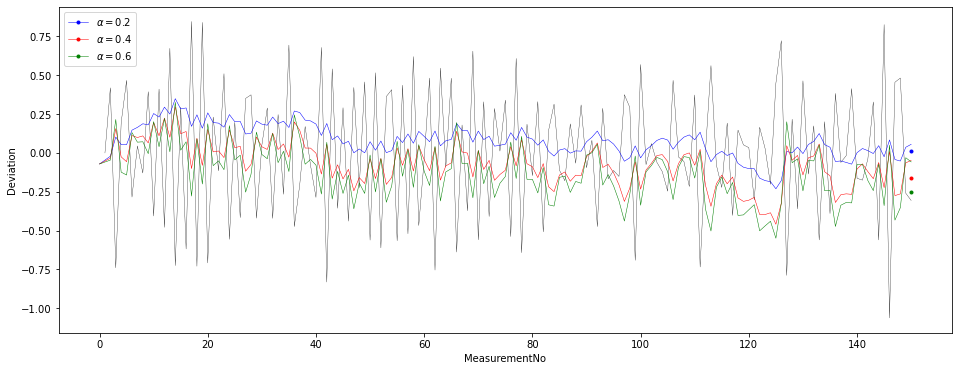

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(series_diff.fillna(0), initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(1).rename(r'$\alpha=0.2$')
fit1_undiffed = pd.concat([pd.Series(series_init), fit1.fittedvalues.iloc[1:]], axis=0).cumsum()
fcast1_undiffed = fit1_undiffed.iloc[-1] + fcast1.cumsum()

fit2 = SimpleExpSmoothing(series_diff.fillna(0), initialization_method="heuristic").fit(smoothing_level=0.4,optimized=False)
fcast2 = fit2.forecast(1).rename(r'$\alpha=0.4$')
fit2_undiffed = pd.concat([pd.Series(series_init), fit2.fittedvalues.iloc[1:]], axis=0).cumsum()
fcast2_undiffed = fit2_undiffed.iloc[-1] + fcast2.cumsum()

fit3 = SimpleExpSmoothing(series_diff.fillna(0), initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast3 = fit3.forecast(1).rename(r'$\alpha=0.6$')
fit3_undiffed = pd.concat([pd.Series(series_init), fit3.fittedvalues.iloc[1:]], axis=0).cumsum()
fcast3_undiffed = fit3_undiffed.iloc[-1] + fcast3.cumsum()

plt.figure(figsize=(16, 6))
plt.figure(figsize=(16, 6))
plt.xlabel("MeasurementNo")
plt.ylabel("Deviation")
plt.plot(series_diff.fillna(0), "-", color='black', linewidth=.3)
plt.plot(fit1_undiffed,  color='blue', linewidth=.5)
line1, = plt.plot(fcast1_undiffed, marker='o', markersize=3, color='blue', linewidth=.5)
plt.plot(fit2_undiffed,  color='red', linewidth=.5)
line2, = plt.plot(fcast2_undiffed, marker='o', markersize=3,  color='red', linewidth=.5)
plt.plot(fit3_undiffed,  color='green', linewidth=.5)
line3, = plt.plot(fcast3_undiffed, marker='o', markersize=3,  color='green', linewidth=.5)
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
#fit3_undiffed.iloc[-1] + fcast3_undiffed.cumsum()
fcast3_undiffed = fit3_undiffed.iloc[-1] + fcast3.cumsum()
plt.savefig("./forecasts.png", dpi=288)

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#fit1 = SimpleExpSmoothing(series_diff, initialization_method="estimated").fit()
#plt.plot(fit1.forecast(3))

fit1 = SimpleExpSmoothing(series_diff.fillna(0), initialization_method="heuristic").fit(smoothing_level=0.3)
#fit1 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level']

fit1 = SimpleExpSmoothing(series_diff.fillna(0), initialization_method="heuristic").fit(smoothing_level=0.5)
fit1 = SimpleExpSmoothing(series_diff.fillna(0), initialization_method="heuristic").fit(smoothing_level=0.7)
#fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level']
fit1.forecast(3)
#plt.plot(fit1.fcastvalues)
#plt.plot(fcast1)
#fit1.fcastvalues
fit1.fittedvalues
fit1.forecast(3).rename(r'$\alpha=%s$'%fit1.model.params['smoothing_level'])

150   -0.234481
151   -0.234481
152   -0.234481
Name: $\alpha=0.7$, dtype: float64

In [ ]:

 'aic',
 'aicc',
 'bic',
 'data',
 'fcastvalues',
 'fittedfcast',
 'fittedvalues',
 'forecast',
 'initialize',
 'k',
 'k_constant',
 'level',
 'mle_retvals',
 'model',
 'optimized',
 'params',
 'params_formatted',
 'predict',
 'resid',
 'season',
 'simulate',
 'slope',
 'sse',
 'summary',
 'trend']

<AxesSubplot:xlabel='MeasurementNo'>

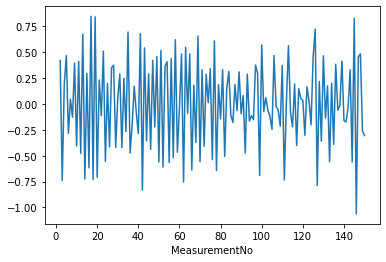

In [77]:
series_diff.dropna().plot()

/Users/patrikkj/miniconda3/envs/plaace/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


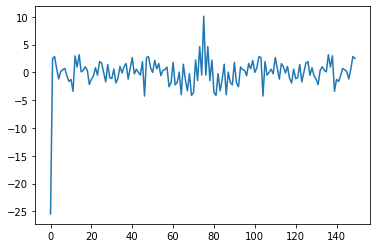

In [94]:
import numpy as np
from scipy.fftpack import fft, fftfreq

# get top 3 seasons
no_of_seasons=5
series = np.asarray(df.Deviation)
# Compute FFT
series_fft = fft(series)

# Compute the power
power = np.abs(series_fft)

# Get the corresponding frequencies
sample_freq = fftfreq(series_fft.size)

# Find the peak frequency: we only need the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

# find top frequencies and corresponding time periods for seasonal pattern
top_powers = np.argpartition(powers, -no_of_seasons)[-no_of_seasons:]

time_periods_from_fft = 1 / freqs[top_powers]
time_periods = time_periods_from_fft.astype(int)
plt.plot(series_fft)

<AxesSubplot:>

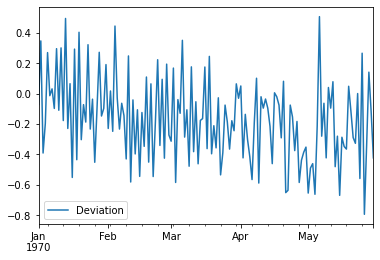

In [58]:
df.set_index(pd.date_range(start=0, periods=df.index.size, freq='D')).plot()

/Users/patrikkj/miniconda3/envs/plaace/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


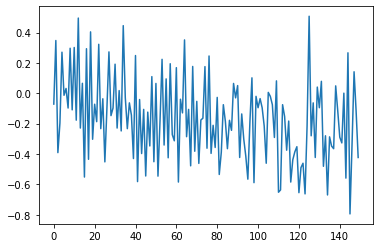

In [83]:
import scipy as sp
plt.plot(sp.fft.fft(df))

<AxesSubplot:xlabel='MeasurementNo'>

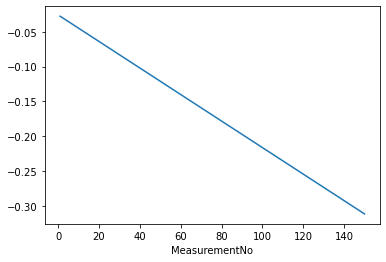

In [32]:
(df.Deviation - tsa.tsatools.detrend(df.Deviation)).plot()

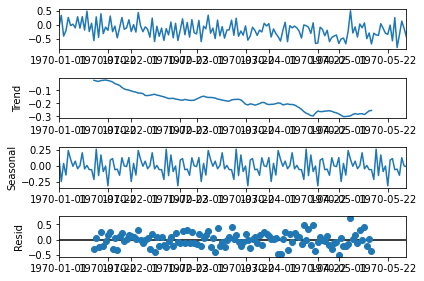

In [79]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df.set_index(pd.date_range(start=0, periods=df.index.size, freq='D')), model='additive', period=30)
fig = decomposition.plot()
plt.show()
decomposition

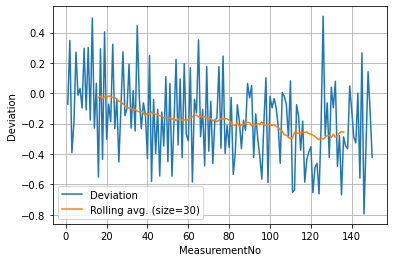

In [29]:
df.assign(rolling_avg=lambda df: df.rolling(30, center=True).mean()) \
    .rename(columns={"rolling_avg": "Rolling avg. (size=30)"}) \
    .plot(grid=True, ylabel="Deviation") \
    .get_figure() \
    .savefig('./series_with_rolling_avg.png');

In [ ]:
volumes.plot(figsize=(18, 8), grid=True, linewidth=.5) \
    .get_figure() \
    .savefig('./graphics/EXAA_volume_merged.png');

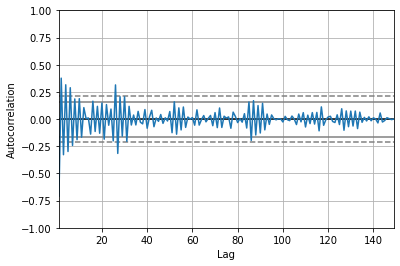

In [33]:
# Check for autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_diff.dropna()) \
    .get_figure() \
    .savefig('./autocorrelation_plot_diffed.png');
#plt.show()
#plt.savefig('./autocorrelation_plot.png')

"""
    .rename(columns={"rolling_avg": "Rolling avg. (size=30)"}) \
    .plot(grid=True, ylabel="Deviation") \
    .get_figure() \
    .savefig('./series_with_rolling_avg.png');
#fig
""";

In [67]:
# Augmented Dickey-Fuller Test - checks for stationarity
from statsmodels.tsa.stattools import adfuller
results = adfuller(data)

print(f'ADF Statistic: {results[0]:.3f}')
print(f'p-value: {result[1]:.3f}')
print('Critical Values:')
for key, value in stats.items():
    print(f'\t{key}: {value:.3f}')

ADF Statistic: -4.185
p-value: 0.001
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


/Users/patrikkj/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/patrikkj/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/patrikkj/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/patrikkj/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn

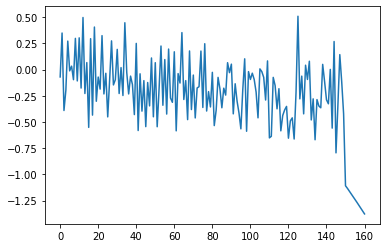

In [71]:
# Create forecasts
model = SARIMAX(train_df, order=(10, 3, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(150,160)
res = np.hstack([ data, yhat])
plt.plot(range(161), res)
plt.show()

Package                       Version
----------------------------- ----------
absl-py                       0.11.0
anyio                         2.1.0
appdirs                       1.4.4
appnope                       0.1.2
argon2-cffi                   20.1.0
astroid                       2.4.2
astunparse                    1.6.3
async-generator               1.10
attrs                         20.3.0
autopep8                      1.5.4
Babel                         2.9.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.1
black                         20.8b1
bleach                        3.3.0
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
cffi                          1.14.4
chardet                       4.0.0
click                         7.1.2
conda                         4.9.2
conda-package-handling        1.7.2
cryptography                  3.3.1
cycler       